<a href="https://colab.research.google.com/github/masa512/PCA/blob/main/multidimensional_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [ ]:
# Read the world city dataset
df = pd.read_csv('worldcities.csv')
# We are only interested in the following cities
cities = ['Tokyo','Seoul','Delhi','Beijing','Malibu','Hanoi','Manila','Moscow','Mexico City','Bangkok','Rome','Paris','Istanbul','Jerusalem','New York','Vancouver','Brussels','Chicago','Berlin']
# Filter out entries on cities
df_filt = df.loc[df['city'].isin(cities)].drop_duplicates(subset='city')


# Lets do some experiment
df_filt

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
5,Seoul,Seoul,37.5600,126.9900,South Korea,KR,KOR,Seoul,primary,22394000.0,1410836482
8,Mexico City,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,21505000.0,1484247881
11,Beijing,Beijing,39.9040,116.4075,China,CN,CHN,Beijing,primary,19437000.0,1156228865
12,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18713220.0,1840034016
14,Moscow,Moscow,55.7558,37.6178,Russia,RU,RUS,Moskva,primary,17693000.0,1643318494
15,Bangkok,Bangkok,13.7500,100.5167,Thailand,TH,THA,Krung Thep Maha Nakhon,primary,17573000.0,1764068610
20,Istanbul,Istanbul,41.0100,28.9603,Turkey,TR,TUR,İstanbul,admin,15311000.0,1792756324


In [ ]:
# Now we can define a function to return matrix of distances between cities
# We will use the order defined in cities as the indices representation of each city
def dist_xy(x1,y1,x2,y2):
  d = math.sqrt((x1-x2)**2+(y1-y2)**2)
  return d 

def dist_mtx(df,cities):
  dist_list = np.array([[dist_xy(df.iloc[i]['lat'],df.iloc[i]['lng'],df.iloc[j]['lat'],df.iloc[j]['lng']) for i in range(len(cities))] for j in range(len(cities))])
  return dist_list

Text(0.5, 1.0, 'Distance (km) between major cities')

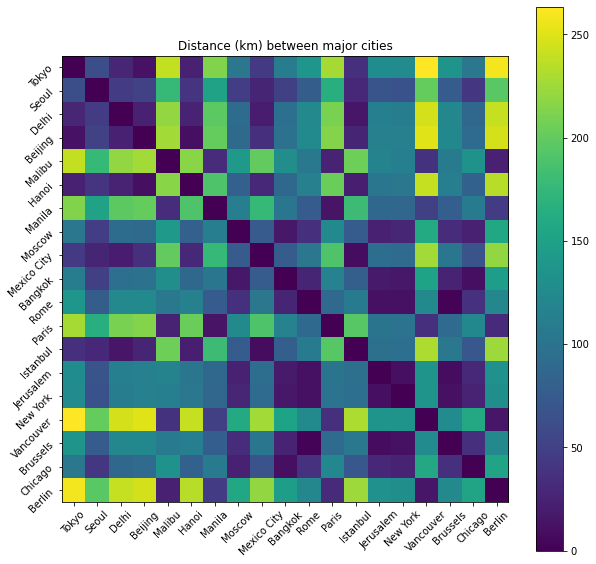

In [ ]:
# Lets test
plt.figure(figsize=(10,10))
plt.imshow(dist_mtx(df_filt,cities))
_=plt.xticks(np.arange(len(cities)), cities,rotation=45)
_=plt.yticks(np.arange(len(cities)), cities,rotation=45)
cbar = plt.colorbar()
plt.title('Distance (km) between major cities')

Now we are going to assume that we are only provided with the distance matrix (not the actual coordinate or any numerical representation of each city).

Our goal is to cluster the cities in new latent space (2D) given this metric

We will use the following equation to extract the zero-mean version of distance matrix as shown below

$${S} = -\frac{1}{2}({D}-\frac{1}{N}D\cdot1_N\cdot1_N^{T}-\frac{1}{N}\cdot1_N\cdot1_N^{T}D+\frac{1}{N^2}1_N\cdot1_N^{T}\cdot D \cdot1_N\cdot1_N^{T})$$

Text(0.5, 1.0, 'Distance (km) between major cities')

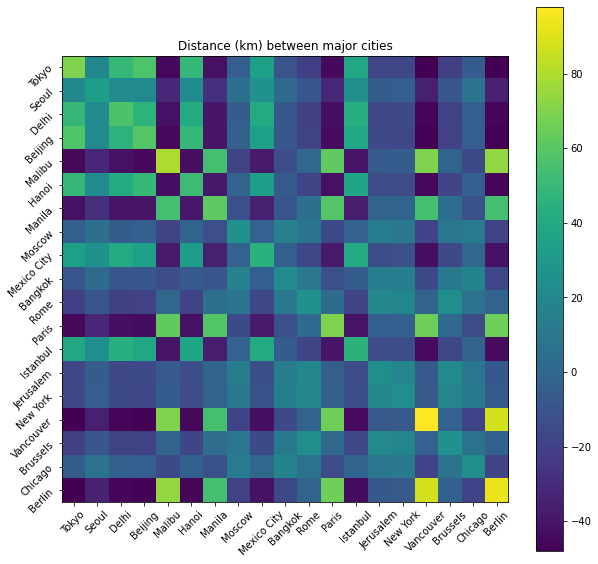

In [ ]:
D = dist_mtx(df_filt,cities)
O = 
 # 1*1 matrix for later use
N = D.shape[0]

S = -1/2*(D-1/N*D@O-1/N*O@D+1/N**2*O@D@O)

# Lets test
plt.figure(figsize=(10,10))
plt.imshow(S)
_=plt.xticks(np.arange(len(cities)), cities,rotation=45)
_=plt.yticks(np.arange(len(cities)), cities,rotation=45)
cbar = plt.colorbar()
plt.title('Distance (km) between major cities')

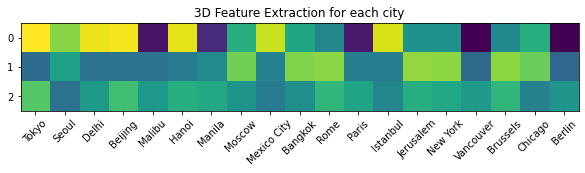

In [ ]:
# We are going to perform eigen decomposition of S to find X
lambd,V = np.linalg.eig(S)

# Sort the eigenvectors and values based on eigenvalue
index = lambd.argsort()[::-1]
V_sorted = V[:,index]
L_sorted = np.diag(lambd[index])

# Only extract the top two V and L 
Nd = 3
V = V_sorted[:,:3]
L = L_sorted[:3,:3]

# Structure the data in 2D subspace
X = np.sqrt(L)@V.T

# Lets test
plt.figure(figsize=(10,10))
plt.imshow(X)
plt.title('3D Feature Extraction for each city')
_=plt.xticks(np.arange(len(cities)), cities,rotation=45)

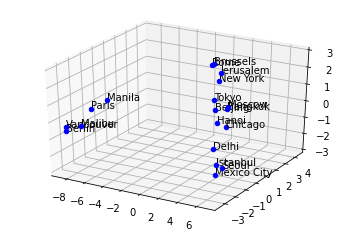

In [ ]:
# We are going to 3D scatter plot the result to visualize the new feature space

ax = plt.figure().add_subplot(projection='3d')

for c in range(len(cities)):
  ax.scatter(X[0,c],X[1,c],X[2,c],color='b')
  ax.text(X[0,c],X[1,c],X[2,c],cities[c])

# Different dataset

In [ ]:
df = pd.read_csv('capdist.csv')


In [ ]:
# We are interest in the following countries to be included
countries = ["USA","JPN","CAN","VEN","BRA","UK","FRN","GMY","SLV","RUS","FIN","SWD","GHA","TOG","NIG","EGY","SYR","SPN","ITA"]

# Filter the country 1 and country 2 by above list
df_filt = df.loc[df['ida'].isin(countries) & df['idb'].isin(countries)]
     

In [ ]:
# Now we want to form the matrix out of the following list
def cnt_to_dist(df,countries,i,j):

  if i == j:
    return 0
  
  the_df = df.loc[(df['ida'] == countries[i]) & (df['idb'] == countries[j])]
  return the_df['kmdist'].values[0]

Nc = len(countries)
D = [[cnt_to_dist(df,countries,i,j) for i in range(Nc)] for j in range(Nc)]
     


In [ ]:
# Visualize the Output distance matrix

plt.figure(figsize=(10,10))
plt.imshow(D)
_=plt.xticks(np.arange(len(countries)), countries,rotation=45)
_=plt.yticks(np.arange(len(countries)), countries,rotation=45)
cbar = plt.colorbar()
plt.title('Distance (km) between major cities')